# K Nearest Neighbor

## Algorithm/Concept

The (k) nearest neighbor algorithm is a supervised learning method based on the idea that 
that closer data points are more similar, and is commonly used in both regression and
classification. In practice, this can be used to estimate missing information or predict new variables.

In the regression case, values are predicted from an average of the k values closest to the data.
For example, if you wanted to predict the weight of a new subject based on their height, from the 
k heights closest to them you would take the average of their weights as the subject's weight.

For classification, assignment is based on a majority rule. If .55$k$ of the $k$ data points belong 
to Group A, the new point will also be classified as Group A. 

Basic Implementation:
1. Choose an arbitrary value for k (often between 5 and 10).
2. Fit the data to the classification or regression model.
3. Using the k nearest training data points, categorize or predict the value of the new data point.
4. Optimize k value from the training data and created model.

## Unsupervised Nearest Neighbor

While we focus on the supervised methodology, there is also an unsupervised version which uses 
different algorithms (`brute` force, `ball_tree`, or `kd_tree`) to find the k nearest neighbors, where 
efficiency is based on number of sample, value of k, data structure, etc.

In Python: [`sklearn.neighbors.NearestNeighbors`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)

> Notes: 
>
> An issue with k nearest neighbor is that if there is a significant difference in the number of observations 
in each group, then larger classes to to overpower smaller ones. The most common solution is to weight each 
observation, such that closer observations hold more deciding power than those further away. While this 
is especially problematic in classification, weights can be applied to regression aswell.
>
> The algorithm is also very sensitive to the value of k. A particularly small value of k increases the 
liklihood of overfitting the to the training data, and too large a k reduces the accuracy of the model all 
around. The model should be optimized for a value of k that minimizes error rate (RMSE or MSE).
>
> Categorical data would need to be encoded - converted into numerical data before use.


In Python, the scikit-learn library contains multiple packages to implement the k 
nearest neighbor algorithm in Python. The example below uses:

`model_selection`, `neighbors`, and `metrics`


## Classification Example (Supervised)

In [1]:
import pandas as pd

url = \
'https://raw.githubusercontent.com/statds/ids-s22/main/notes/data/nyc_DobJobApp_2021.csv'
    
dob_job = pd.read_csv(url)

dob_job.info()

/tmp/ipykernel_3866/3937316007.py:6: DtypeWarning: Columns (23,24,25,26,29,31,32,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  dob_job = pd.read_csv(url)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20087 entries, 0 to 20086
Data columns (total 96 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job #                          20087 non-null  int64  
 1   Doc #                          20087 non-null  int64  
 2   Borough                        20087 non-null  object 
 3   House #                        20087 non-null  object 
 4   Street Name                    20087 non-null  object 
 5   Block                          20087 non-null  int64  
 6   Lot                            20087 non-null  int64  
 7   Bin #                          20087 non-null  int64  
 8   Job Type                       20087 non-null  object 
 9   Job Status                     20087 non-null  object 
 10  Job Status Descrp              20087 non-null  object 
 11  Latest Action Date             20087 non-null  object 
 12  Building Type                  20087 non-null 

In the below example, we will be using a subset of the DOB Job Application dataset,
for plumbing jobs that occurred in family homes.

In [2]:
plumbing_job = dob_job[(dob_job['Plumbing'] == 'X') & 
                       (dob_job['Building Type'] == '1-2-3 FAMILY')]

plumbing_job = plumbing_job[['Total Est. Fee', 'Borough', 'Job Type', 'Job Status', 
                    'Building Type','Latest Action Date', 'GIS_LATITUDE', 
                    'GIS_LONGITUDE']]

plumbing_job = plumbing_job.dropna()

plumbing_job.head()

,Total Est. Fee,Borough,Job Type,Job Status,Building Type,Latest Action Date,GIS_LATITUDE,GIS_LONGITUDE
43,$526.55,BROOKLYN,A2,X,1-2-3 FAMILY,08/05/2021,40.675306,-73.930515
45,$371.80,QUEENS,A2,R,1-2-3 FAMILY,04/29/2021,40.776331,-73.912295
47,$400.36,QUEENS,NB,R,1-2-3 FAMILY,05/27/2021,40.759226,-73.858075
50,$2740.20,MANHATTAN,A1,R,1-2-3 FAMILY,04/29/2021,40.737608,-74.002699
54,$262.60,BROOKLYN,A2,R,1-2-3 FAMILY,04/29/2021,40.588934,-73.988155


We want to try to predict the borough based on the estimated cost of the job.
First we check for an association between variables.

In [3]:
import scipy.stats as ss

plumbing_job['Fee Est.'] = [float(val.strip('$')) for val in plumbing_job['Total Est. Fee']]
est_fee = pd.crosstab(plumbing_job['Fee Est.'], plumbing_job['Borough'])
est_fee

chi2, p, dof, ex = ss.chi2_contingency(est_fee)
p

0.0002851383836738717

/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fee Est.', ylabel='Borough'>

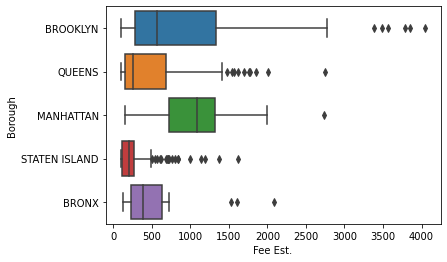

In [4]:
import seaborn as sns

sns.boxplot(plumbing_job['Fee Est.'], plumbing_job['Borough'])

In [5]:
name_dict = {'BROOKLYN':0, 'QUEENS':0, 'MANHATTAN':0, 'STATEN ISLAND':0, 'BRONX':0}

for key, value in name_dict.items():
    new_value = plumbing_job.value_counts(plumbing_job['Borough'] == key)
    name_dict[key] = new_value
    
name_dict

{'BROOKLYN': Borough
 False    380
 True     180
 dtype: int64,
 'QUEENS': Borough
 False    335
 True     225
 dtype: int64,
 'MANHATTAN': Borough
 False    546
 True      14
 dtype: int64,
 'STATEN ISLAND': Borough
 False    446
 True     114
 dtype: int64,
 'BRONX': Borough
 False    533
 True      27
 dtype: int64}

Since there is a signifcant difference in the number of observations for each borough,
and much of the data appears to overlap, we will create two classifiers, weighted and 
unweighted. This will hopefully help reduce boroughs with fewer observations from being
hidden by larger boroughs.

In [6]:
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split

x = plumbing_job[['Fee Est.']]
y = plumbing_job['Borough']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 100)

# train_test_split = separates data into test and training subsets 

knn = neighbors.KNeighborsClassifier()
knn.fit(x, y)
print(knn.predict([[750]]))

knn_weight = neighbors.KNeighborsClassifier(weights='distance')
knn_weight.fit(x, y)
print(knn_weight.predict([[750]]))

['BROOKLYN']
['QUEENS']


/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [7]:
from sklearn.metrics import accuracy_score

predictions1 = knn.predict(xtest)
predictions2 = knn_weight.predict(xtest)
print(accuracy_score(ytest, predictions1))
print(accuracy_score(ytest, predictions2))

0.6285714285714286
0.9


This gives the prediction accuracy from the test data. Factoring in weights for
the data points seems to have greatly improved the accuracy of the classification.


GridSearchCV is used to find the best k value from a dictionary of potential values.
It is the alternative to calculating the validation error (RMSE) for all k.
The value of k must be chosen carefully to avoid overfitting or weakened performance.

In [8]:
from sklearn.model_selection import GridSearchCV
pars = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

model = GridSearchCV(knn, pars)
model.fit(xtrain, ytrain)
model.best_params_

{'n_neighbors': 7}

[More about nearest neighbor](https://scikit-learn.org/stable/modules/neighbors.html)  
[More about GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)